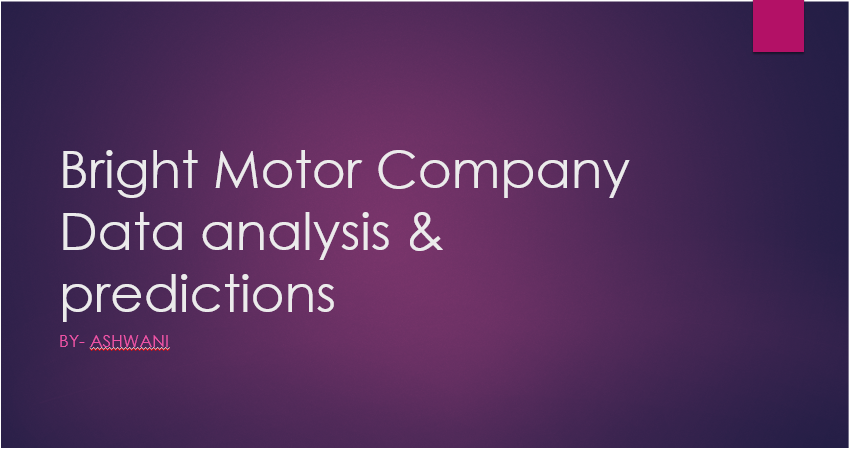

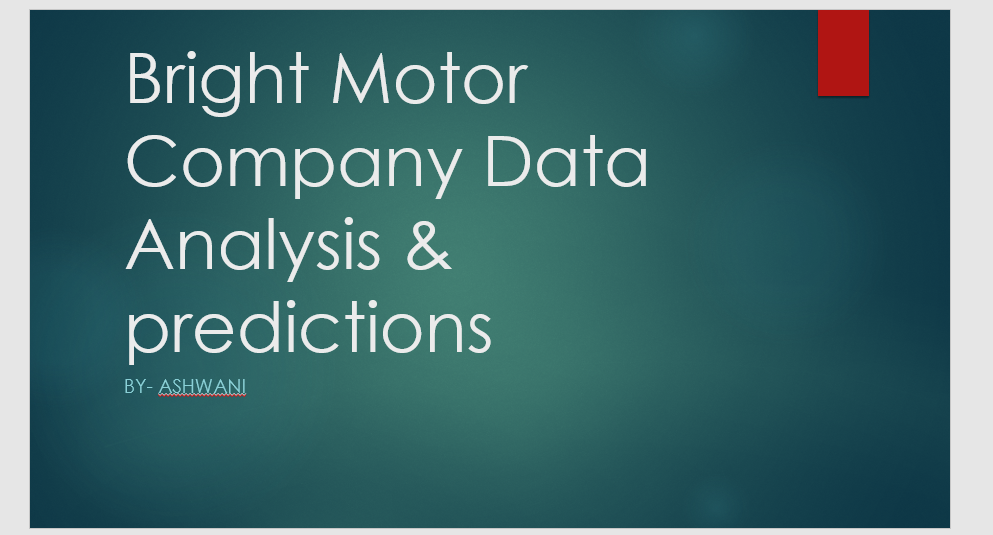

# Index
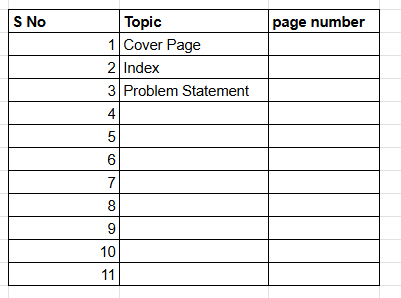


## Problem Statement:
Predicting Customer Purchase Behavior for Bright Motor Company
## Business Context:
Bright Motor Company is looking to optimize its sales strategy by understanding the profiles of individuals likely to purchase their vehicles. They also want to price their products more effectively based on the customer’s profile and financial background.

The company has collected data from previous inquiries and purchases, which includes demographic, professional, and financial attributes of individuals who interacted with their dealership. This information will be used to analyze customer behavior, predict the likelihood of a purchase, and estimate the optimal product pricing strategy.
## Project Objective:
Your objective is to help Bright Motor Company with the following:

1. Exploratory Data Analysis (EDA):
* Understand the structure of the data.
* Identify trends and relationships between customer characteristics and purchase behavior.
* Find potential data quality issues (missing values, outliers, etc.)
* Visualize how salary, profession, education, and other factors relate to car buying behavior.

2. Classification Task (Binary Classification):
* Problem: Predict whether a customer will purchase a car or not (you may use the Make or create a derived binary target like Will_Purchase = 1 if Make is not null).
* Goal: Build and evaluate classification models (e.g., Logistic Regression, Decision Trees, Random Forest, etc.) to predict customer purchase decisions based on demographic and financial features.

3. Regression Task (Predictive Modeling):
* Problem: Predict the Price of the car purchased by the customer based on their demographic and financial profile.
* Goal: Build regression models (e.g., Linear Regression, Decision Tree Regressor, etc.) to estimate the appropriate price point for a customer.

4. Model Evaluation:
* Use appropriate metrics like:
* Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC
* Regression: RMSE, MAE, R²
* Perform cross-validation and hyperparameter tuning where applicable.

5. Model Deployment (Optional if time permits):
* Deploy the classification and regression models using Flask/Streamlit to demonstrate how Bright Motor Company can use this model in real-time.
* Create a basic UI where the company can input customer data and receive purchase predictions and recommended price.

#### Importing the necessary libraries

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading the dataset

In [197]:
df = pd.read_csv('bright_automotive_company.csv')

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [198]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


###### Observations:
1. There are some values in Gender which are required to be corrected.
2. In the feature No_of_Dependents we are having wrong entries like "?".
3. Many features have values which are not required so we need to replace them

#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [199]:
df.shape

(1586, 14)

###### Result:
There are 1586 rows and 14 columns in dataset

#### 1.3 Checking the info of dataset

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1586 non-null   int64  
 1   Gender            1533 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1586 non-null   object 
 4   Education         1586 non-null   object 
 5   No_of_Dependents  1586 non-null   object 
 6   Personal_loan     1586 non-null   object 
 7   House_loan        1586 non-null   object 
 8   Partner_working   1586 non-null   object 
 9   Salary            1573 non-null   float64
 10  Partner_salary    1480 non-null   float64
 11  Total_salary      1586 non-null   int64  
 12  Price             1586 non-null   int64  
 13  Make              1586 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.6+ KB


In [201]:
df.isnull().sum()

Age                   0
Gender               53
Profession           11
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [202]:
df.duplicated().sum()

5

In [203]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [204]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Profession"].fillna(df["Profession"].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21648\3838501661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_21648\3838501661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []


<Axes: ylabel='Salary'>

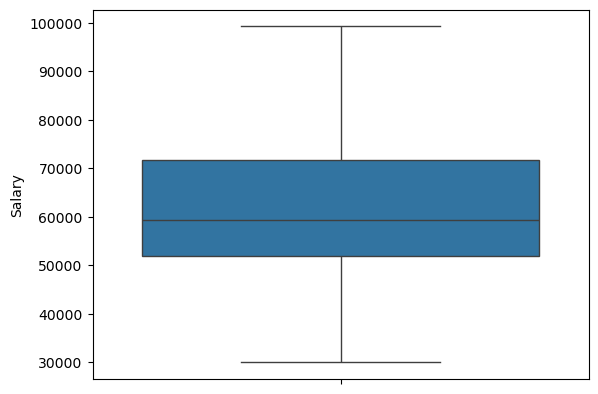

In [205]:
q1=np.quantile(df["Salary"],.25)
q3=np.quantile(df["Salary"],.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
print(df[df["Salary"]<lb])
print(df[df["Salary"]>ub])
sns.boxplot(df["Salary"])

no outliers in salary so we will use mean as the measure to replace null values

In [206]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [207]:
df.fillna({"Salary":df["Salary"].mean()},inplace=True)

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []


<Axes: ylabel='Partner_salary'>

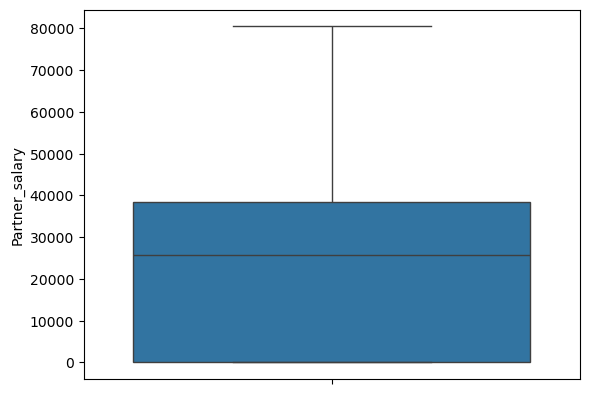

In [208]:
q1=np.quantile(df["Partner_salary"],.25)
q3=np.quantile(df["Partner_salary"],.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
print(df[df["Partner_salary"]<lb])
print(df[df["Partner_salary"]>ub])
sns.boxplot(df["Partner_salary"])

we can replace value of partner salary by subtracting the total salary with the salary to get its value

In [209]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [210]:
df.fillna({"Partner_salary":df["Total_salary"]-df["Salary"]},inplace=True)

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []


<Axes: ylabel='Partner_salary'>

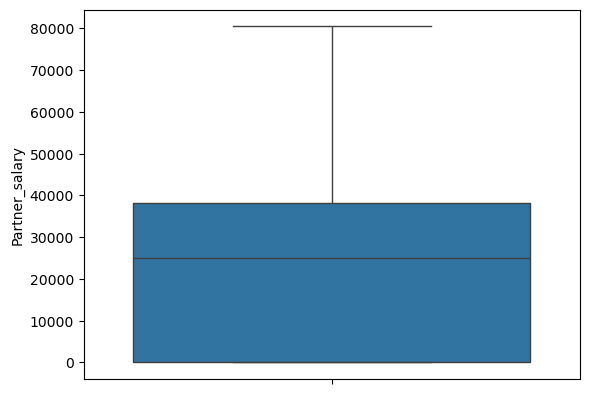

In [211]:
q1=np.quantile(df["Partner_salary"],.25)
q3=np.quantile(df["Partner_salary"],.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
print(df[df["Partner_salary"]<lb])
print(df[df["Partner_salary"]>ub])
sns.boxplot(df["Partner_salary"])

In [212]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

###### Observations:
* 1- Partners of few customers may be home maker and not doing jobs.
* 2- We need to check the record where age is 120.
* 3- We need to check the record where age is 14.

In [213]:
for i in df.columns:
    print(df[i].value_counts())
    print()

Age
28     119
25     118
30     117
29     110
24     104
23     103
27      97
26      96
22      94
39      41
35      41
44      40
38      38
36      35
42      34
45      34
43      34
33      33
32      30
37      30
52      28
41      27
40      25
34      24
46      22
31      21
53      19
47      15
51      14
49      14
50       9
54       8
48       5
14       1
120      1
Name: count, dtype: int64

Gender
Male      1252
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

Profession
Salaried    896
Business    685
Name: count, dtype: int64

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

House_loan
No     1054
Yes     527
Name: count, dtype: int64

Partner_working
Yes    868
No     713
Name: 

In [214]:
df.replace({"Femal":"Female","Femle":"Female"},inplace=True)


In [215]:
df=df[df["No_of_Dependents"]!="?"]
df=df[df["Make"]!="?"]
df=df[df["Age"]!=14]

In [216]:
for i in df.columns:
    print(df[i].value_counts())
    print()

Age
28     119
25     118
30     117
29     110
24     104
23     103
27      97
26      96
22      94
39      41
35      41
44      40
38      38
36      35
42      34
45      34
43      34
33      33
32      30
37      30
41      27
52      26
40      25
34      24
46      22
31      21
53      18
47      15
51      14
49      14
50       9
54       8
48       5
120      1
Name: count, dtype: int64

Gender
Male      1249
Female     328
Name: count, dtype: int64

Profession
Salaried    892
Business    685
Name: count, dtype: int64

Marital_status
Married    1439
Single      138
Name: count, dtype: int64

Education
Post Graduate    982
Graduate         595
Name: count, dtype: int64

No_of_Dependents
3    556
2    555
1    229
4    217
0     20
Name: count, dtype: int64

Personal_loan
Yes    790
No     787
Name: count, dtype: int64

House_loan
No     1051
Yes     526
Name: count, dtype: int64

Partner_working
Yes    866
No     711
Name: count, dtype: int64

Salary
60276.913265    12
564

### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [217]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

##### 2.3.1 Visualizing outliers

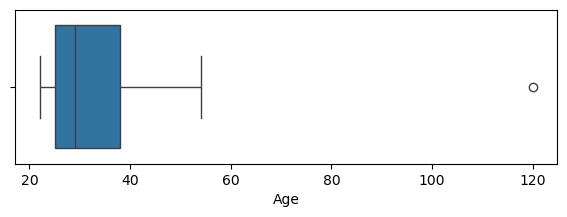

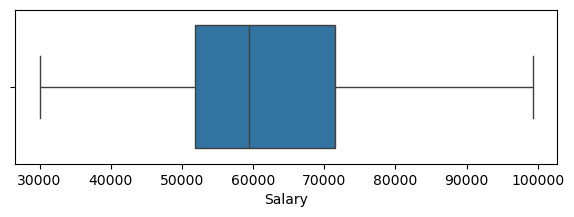

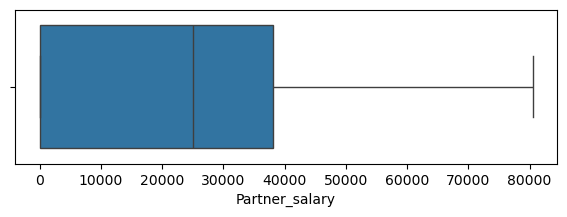

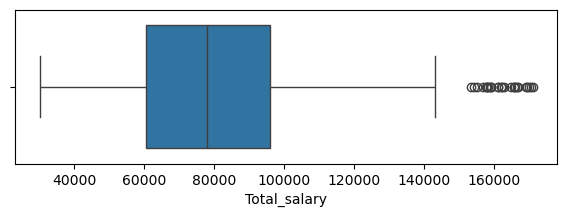

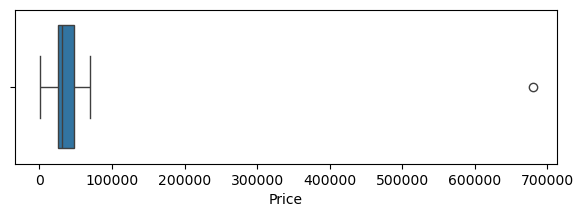

In [218]:
for i in num_variables:
    plt.figure(figsize=(7,2))
    sns.boxplot(data=df, x=i)


###### Observations:
1.there is a row with 120 age, we can drop that
2.same with price
3.There are lot of outliers in total salary

##### 2.3.2 Finding the no. of outliers in each column

In [219]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  Age : 1
-----------------------
Number of ouliers in  Salary : 0
-----------------------
Number of ouliers in  Partner_salary : 0
-----------------------
Number of ouliers in  Total_salary : 27
-----------------------
Number of ouliers in  Price : 1
-----------------------


In [220]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print(i)
    print(df[(df[i]>upper_limit) | (df[i]<lower_limit)])
    print('-----------------------')

Age
    Age  Gender Profession Marital_status      Education No_of_Dependents  \
23  120  Female   Business        Married  Post Graduate                3   

   Personal_loan House_loan Partner_working   Salary  Partner_salary  \
23            No         No             Yes  92600.0         70300.0   

    Total_salary  Price Make  
23        162900  58000  SUV  
-----------------------
Salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Partner_salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Total_salary
     Age  Gender Profession Marital_status      Education No_of_Dependents  \
0     53    Male   Business        Married  Pos

###### Results:
1. There is a large number of outliers in total salary, we will replace those values with the respective quantiles so that it does not affect our regression model
2. Dropping other outliers, since there are 1 or 2 in number

In [221]:
Q1 = df['Total_salary'].quantile(0.25)
Q3 = df['Total_salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Total_salary'] = np.where(df['Total_salary'] < lower, lower, df['Total_salary'])
df['Total_salary'] = np.where(df['Total_salary'] > upper, upper, df['Total_salary'])

In [222]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print(i)
    print(df[(df[i]>upper_limit) | (df[i]<lower_limit)])
    print('-----------------------')

Age
    Age  Gender Profession Marital_status      Education No_of_Dependents  \
23  120  Female   Business        Married  Post Graduate                3   

   Personal_loan House_loan Partner_working   Salary  Partner_salary  \
23            No         No             Yes  92600.0         70300.0   

    Total_salary  Price Make  
23      149150.0  58000  SUV  
-----------------------
Salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Partner_salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Total_salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Pa

In [223]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [224]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


In [225]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print(i)
    print(df[(df[i]>upper_limit) | (df[i]<lower_limit)])
    print('-----------------------')

Age
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Partner_salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Total_salary
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
-----------------------
Price
Empty DataFrame
Columns: [Age, Gender, Profession, Mari

### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables vizual analysis:

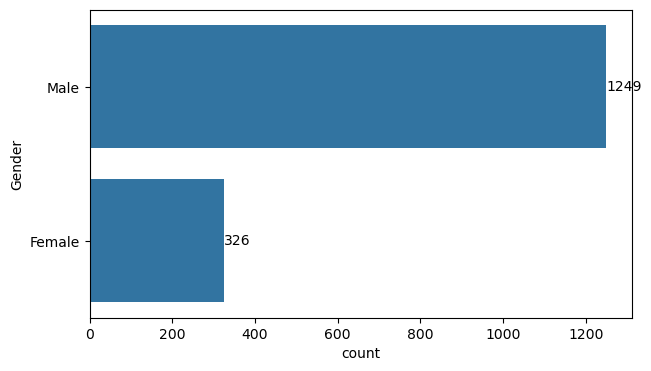

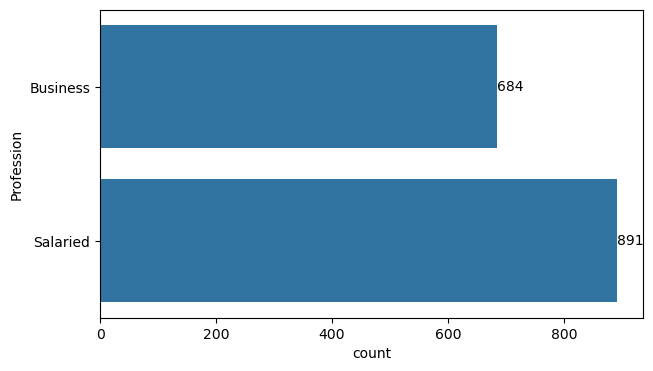

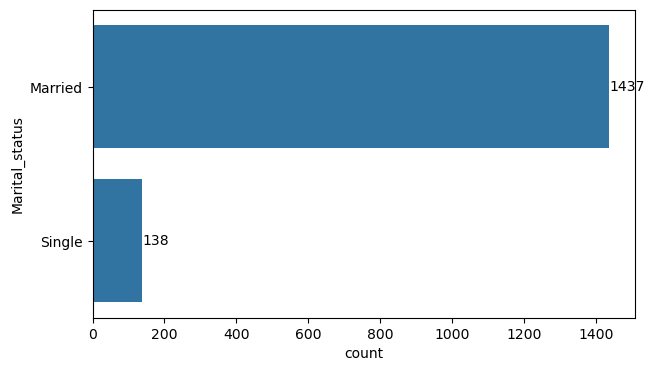

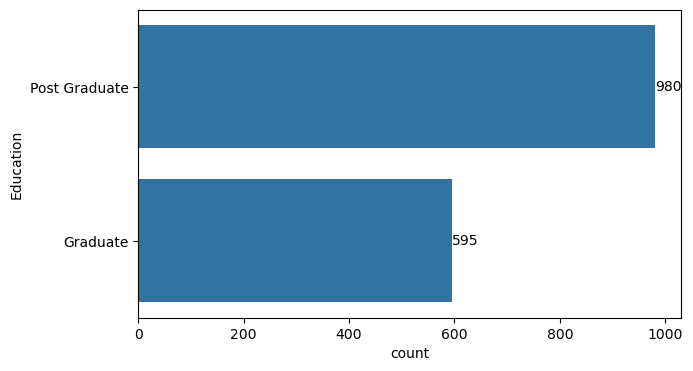

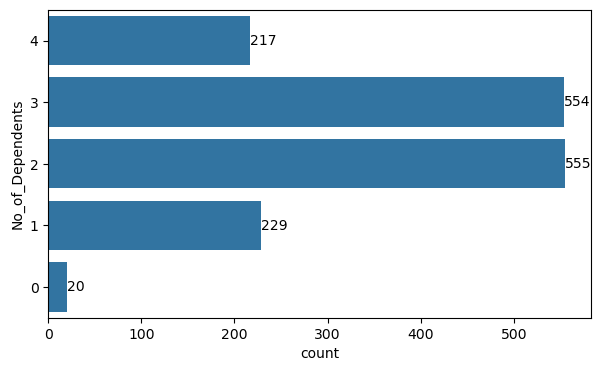

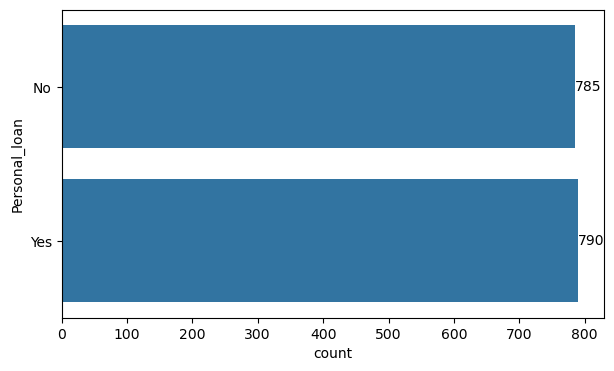

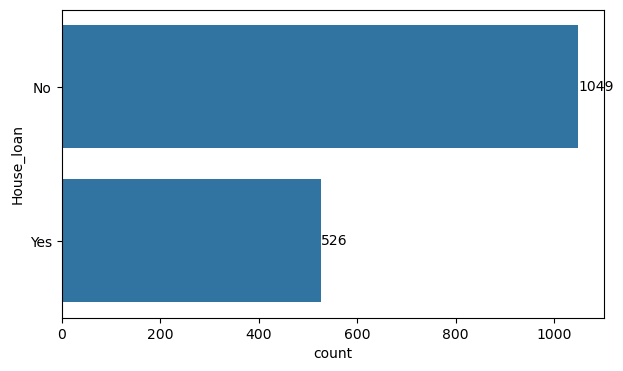

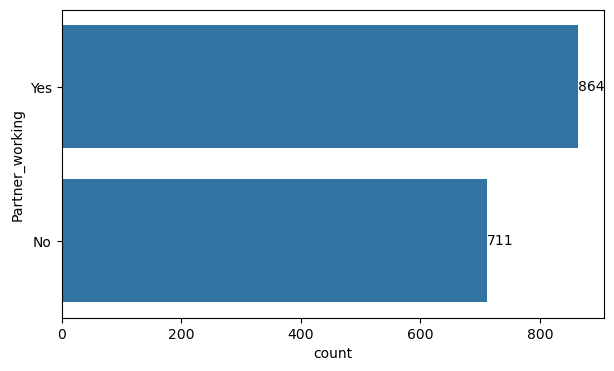

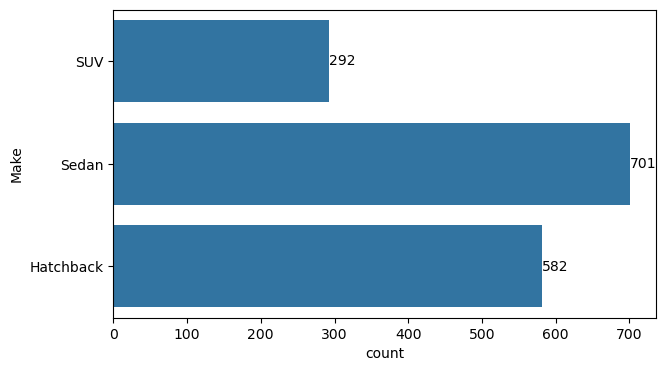

In [226]:
for i in cat_variables:
    plt.figure(figsize=(7,4))
    x=sns.countplot(df[i])
    for j in x.containers:
        x.bar_label(j)
    plt.show()

##### 2.4.2. Categorical variables numerical analysis:

In [227]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

2
Gender
Male      1249
Female     326
Name: count, dtype: int64
-------------
2
Profession
Salaried    891
Business    684
Name: count, dtype: int64
-------------
2
Marital_status
Married    1437
Single      138
Name: count, dtype: int64
-------------
2
Education
Post Graduate    980
Graduate         595
Name: count, dtype: int64
-------------
5
No_of_Dependents
2    555
3    554
1    229
4    217
0     20
Name: count, dtype: int64
-------------
2
Personal_loan
Yes    790
No     785
Name: count, dtype: int64
-------------
2
House_loan
No     1049
Yes     526
Name: count, dtype: int64
-------------
2
Partner_working
Yes    864
No     711
Name: count, dtype: int64
-------------
3
Make
Sedan        701
Hatchback    582
SUV          292
Name: count, dtype: int64
-------------


###### Observations:
1.Number of Salaried Individuals and Business individuals are almost the same

2.More married people are buying than single ones

3.Almost same number of people are there for yes and no in house loan
4.People are most interested in buying Sedans and Hatchbacks only a few people are interested in buying a SUV
5.Most of the people are post graduates who are buying cars

##### 2.4.3. Numerical variables analysis:

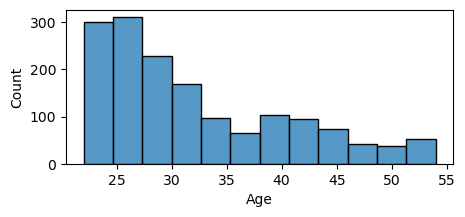

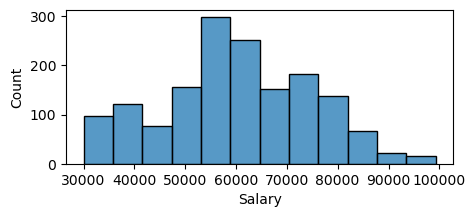

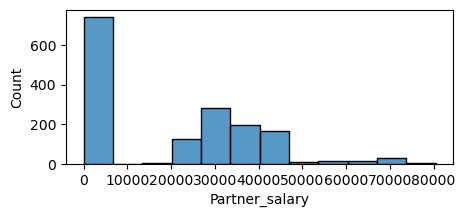

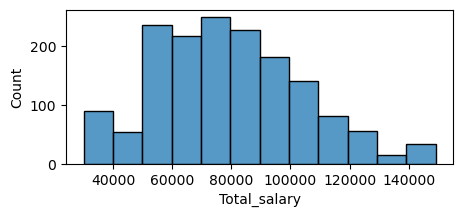

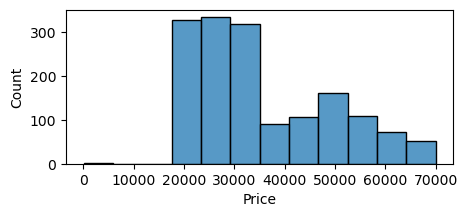

In [228]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i,bins=12);

###### Observations:
1.All of them are above the age of 20
2.Most people buying are between the age range of 20 and 30
3.Most people buying are in the salary range of 50000 to 65000
4.Majority of the people's partners are not working
5.The price range of cars sold is the most in the range of 15000 and 35000 

### 2.5 Bi-variate analysis


##### 2.5.1.1. Numerical analysis:

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1575 non-null   int64  
 1   Gender            1575 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1575 non-null   object 
 4   Education         1575 non-null   object 
 5   No_of_Dependents  1575 non-null   object 
 6   Personal_loan     1575 non-null   object 
 7   House_loan        1575 non-null   object 
 8   Partner_working   1575 non-null   object 
 9   Salary            1575 non-null   float64
 10  Partner_salary    1575 non-null   float64
 11  Total_salary      1575 non-null   float64
 12  Price             1575 non-null   int64  
 13  Make              1575 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 184.6+ KB


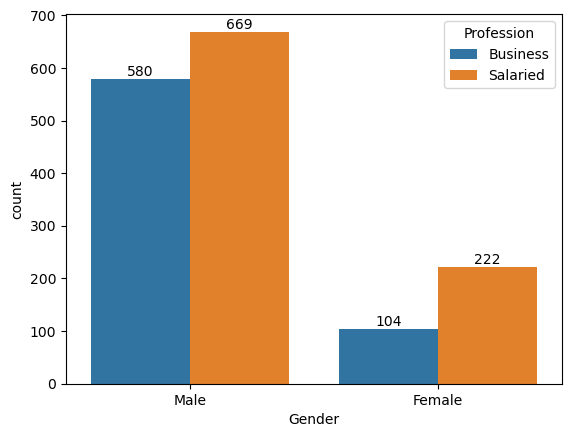

In [230]:
x=sns.countplot(x="Gender",hue="Profession",data=df)
for i in x.containers:
    x.bar_label(i)

The most people buying cars are Male and are Salaried Individuals

There is a huge gap between females and males in terms of buying cars

There isnt much difference between numbers of salaried males and business owned males

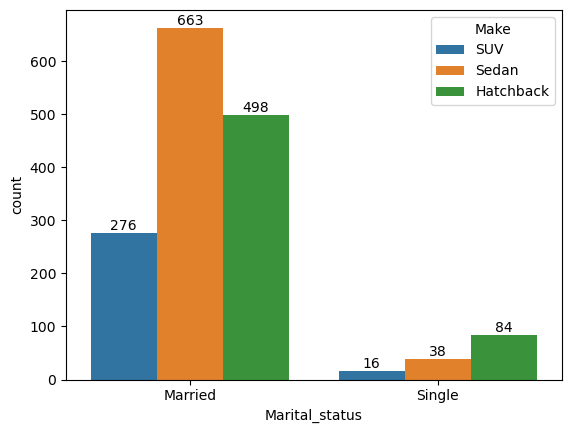

In [231]:
x=sns.countplot(x="Marital_status",hue="Make",data=df)
for i in x.containers:
    x.bar_label(i)

The married individuals are buying Sedans the most, then Hatchbacks

There is a huge gap between single and married individuals in terms of buying cars

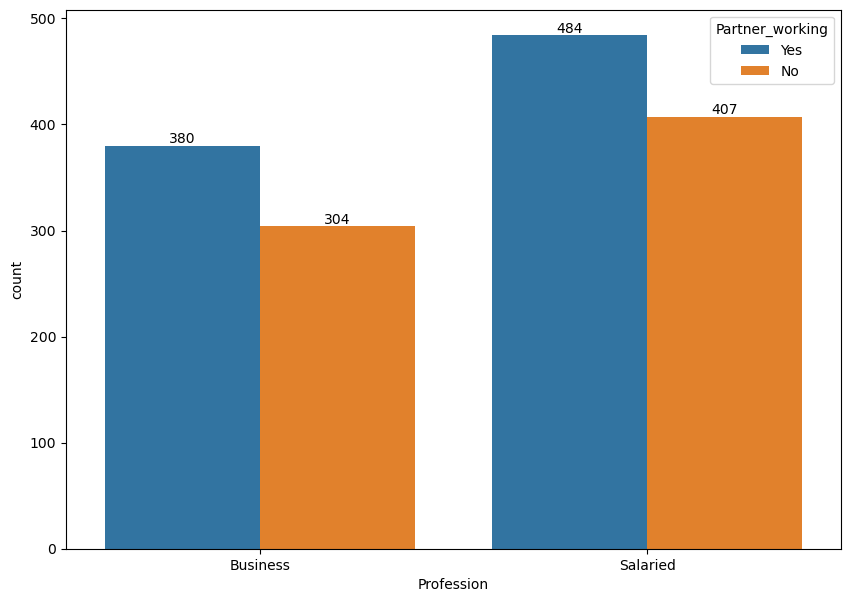

In [232]:
plt.figure(figsize=(10,7))
x=sns.countplot(x="Profession",hue="Partner_working",data=df)
for i in x.containers:
    x.bar_label(i)

Salaried individuals dont have that much difference in terms of their Partners working

Bussiness Individuals also dont have much difference in terms of their partners working 

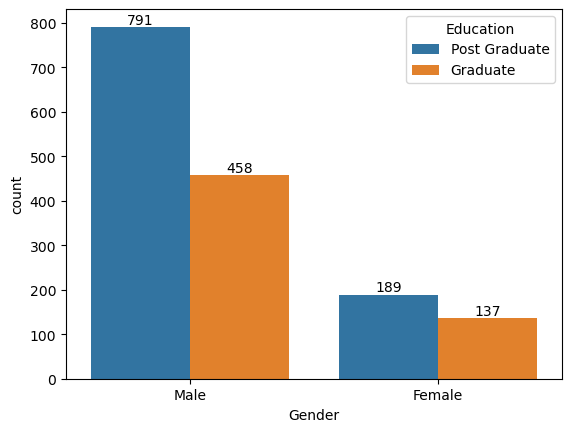

In [233]:
x=sns.countplot(x="Gender",hue="Education",data=df)
for i in x.containers:
    x.bar_label(i)

Most of the buyers are postgraduate males

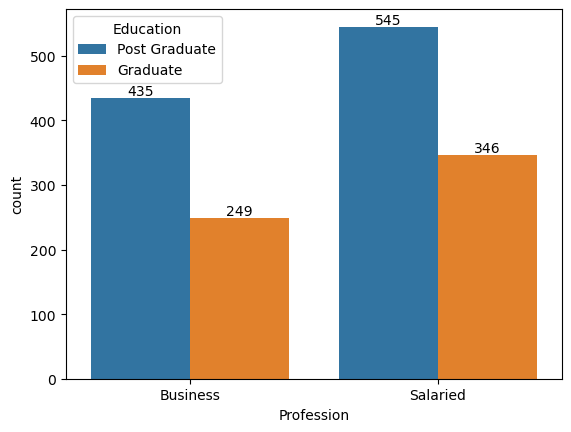

In [234]:
x=sns.countplot(x="Profession",hue="Education",data=df)
for i in x.containers:
    x.bar_label(i)

Most of the buyers are post graduate and salaried there isnt much gap in that and post graduate business owners

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1575 non-null   int64  
 1   Gender            1575 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1575 non-null   object 
 4   Education         1575 non-null   object 
 5   No_of_Dependents  1575 non-null   object 
 6   Personal_loan     1575 non-null   object 
 7   House_loan        1575 non-null   object 
 8   Partner_working   1575 non-null   object 
 9   Salary            1575 non-null   float64
 10  Partner_salary    1575 non-null   float64
 11  Total_salary      1575 non-null   float64
 12  Price             1575 non-null   int64  
 13  Make              1575 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 184.6+ KB


<Axes: xlabel='Price', ylabel='Total_salary'>

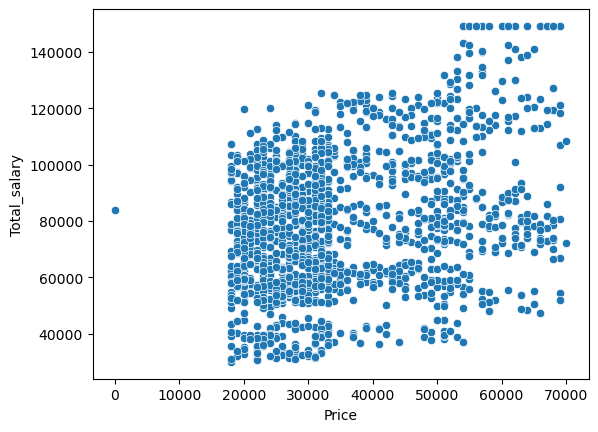

In [236]:
sns.scatterplot(data=df,x="Price",y="Total_salary")

##### Checking the correlation with heatmap to check above observation

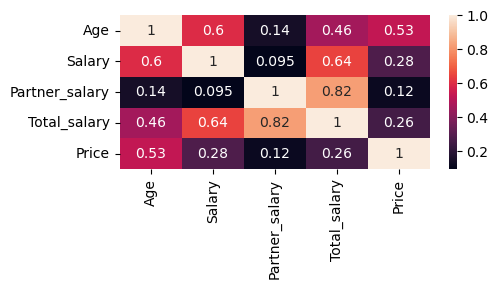

In [237]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

##### Results:
1. Partner Salary is heavily correlated with total salary
2. Price has a high corr with Age
3. Salary has a high correlation with Total salary as well

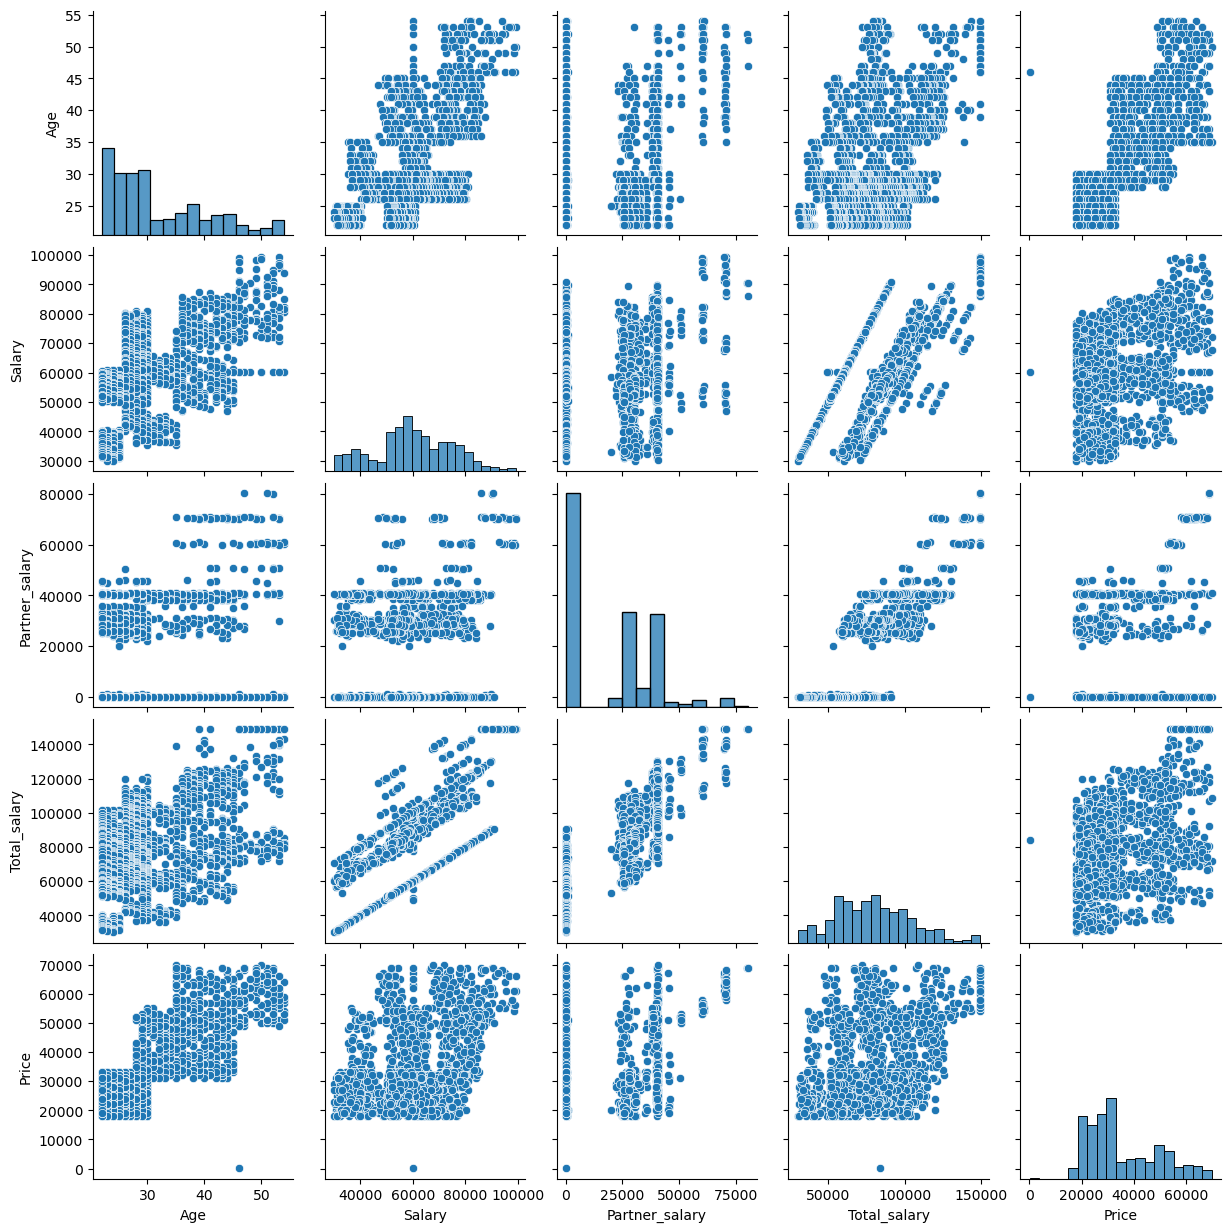

In [238]:
sns.pairplot(df)

## 3.5 Encoding 

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [239]:
df['No_of_Dependents'] = df['No_of_Dependents'].astype(int)

cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])
cat_variables.columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

#### Note
* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>> No feature
* Ordinal features ===>> Education

In [240]:
# 1. Ordinal encoding
df['Education']=pd.Categorical(df['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes

In [241]:
df['Education'].value_counts()

Education
1    980
0    595
Name: count, dtype: int64

In [243]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,1,4,No,No,Yes,99300.0,70700.0,149150.0,61000,SUV
1,53,Female,Salaried,Married,1,4,Yes,No,Yes,95500.0,70300.0,149150.0,61000,SUV
2,53,Female,Salaried,Married,1,3,No,No,Yes,97300.0,60700.0,149150.0,57000,SUV
4,53,Male,Salaried,Married,1,3,No,No,Yes,79700.0,60200.0,139900.0,57000,SUV
5,53,Female,Salaried,Married,1,3,No,No,Yes,79800.0,60500.0,140300.0,57000,SUV


In [245]:
# 2. Nominal encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    df[i]=pd.Categorical(df[i],ordered= False).codes


In [250]:
# 3. One Hot encoding
dummy=pd.get_dummies(df[['Gender','Profession']],dtype='int')
df = pd.concat([df, dummy], axis=1)
df.drop(['Gender', 'Profession'], axis=1, inplace=True)
df.head()

,Age,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53,0,1,4,0,0,1,99300.0,70700.0,149150.0,61000,1,0,1,1,0
1,53,0,1,4,1,0,1,95500.0,70300.0,149150.0,61000,1,1,0,0,1
2,53,0,1,3,0,0,1,97300.0,60700.0,149150.0,57000,1,1,0,0,1
4,53,0,1,3,0,0,1,79700.0,60200.0,139900.0,57000,1,0,1,0,1
5,53,0,1,3,0,0,1,79800.0,60500.0,140300.0,57000,1,1,0,0,1


##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


Splitting

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
df.columns

Index(['Age', 'Marital_status', 'Education', 'No_of_Dependents',
       'Personal_loan', 'House_loan', 'Partner_working', 'Salary',
       'Partner_salary', 'Total_salary', 'Price', 'Make', 'Gender_Female',
       'Gender_Male', 'Profession_Business', 'Profession_Salaried'],
      dtype='object')

In [256]:
x=df[['Age', 'Marital_status', 'Education', 'No_of_Dependents',
       'Personal_loan', 'House_loan', 'Partner_working', 'Salary',
       'Partner_salary', 'Total_salary', 'Gender_Female',
       'Gender_Male', 'Profession_Business', 'Profession_Salaried','Make']]
y=df[["Price"]]


In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

##### Most common techniques:
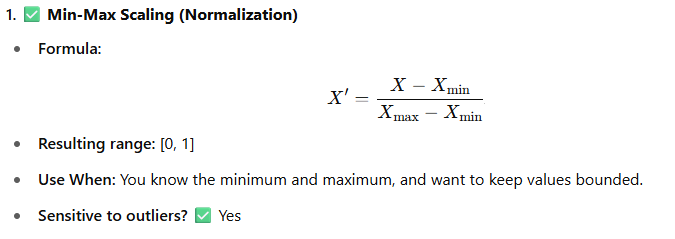
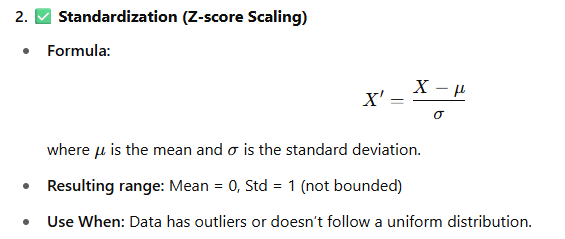

In [259]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_train=sc1.fit_transform(x_train)
x_test=sc1.transform(x_test)
sc2=StandardScaler()
y_train=sc1.fit_transform(y_train)
y_test=sc1.transform(y_test)


#### Summary Table of most popular methods;
| Method          | Range    | Affected by Outliers | Use Case                            |
| --------------- | -------- | -------------------- | ----------------------------------- |
| Min-Max Scaling | \[0, 1]  | ✅ Yes                | Image data, bounded values          |
| Standardization | \~N(0,1) | ❌ Less               | Linear models, SVM, Neural Networks |
| Robust Scaling  | Depends  | ❌ No                 | Data with outliers                  |
| MaxAbs Scaling  | \[-1, 1] | ❌ Less               | Sparse data (e.g., NLP features)    |


In [262]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [272]:
pred=linreg.predict(x_test)

In [273]:
tpred=pred.flatten()
d={"Actual":y_test.flatten(),"Predicted":tpred}
print(y_test.flatten().shape)
print(tpred.shape)

(315,)
(315,)


In [274]:
df2=pd.DataFrame(d)
df2.head()

,Actual,Predicted
0,-0.832238,-0.628440
1,0.267093,-0.221263
2,-0.319217,-0.602078
3,0.120516,0.290327
4,0.267093,0.478277


In [275]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,tpred)

In [276]:
print(r2)

0.7010807559406879
